In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from sqlalchemy import and_

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt
from datetime import datetime, timedelta

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurements = Base.classes.measurement
Station = Base.classes.station


In [9]:
Measurements.__table__.columns.values()

[Column('id', INTEGER(), table=<measurement>, primary_key=True, nullable=False),
 Column('station', TEXT(), table=<measurement>),
 Column('date', TEXT(), table=<measurement>),
 Column('prcp', FLOAT(), table=<measurement>),
 Column('tobs', FLOAT(), table=<measurement>)]

In [10]:
Station.__table__.columns.values()

[Column('id', INTEGER(), table=<station>, primary_key=True, nullable=False),
 Column('station', TEXT(), table=<station>),
 Column('name', TEXT(), table=<station>),
 Column('latitude', FLOAT(), table=<station>),
 Column('longitude', FLOAT(), table=<station>),
 Column('elevation', FLOAT(), table=<station>)]

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [30]:
connection = engine.connect()
climateAnalysis = pd.read_sql('Select * from Measurement', connection, parse_dates=['date'])
finalDate = climateAnalysis.date.max()
initialDate = finalDate - timedelta(days = 365)
initialDate

Timestamp('2016-08-23 00:00:00')

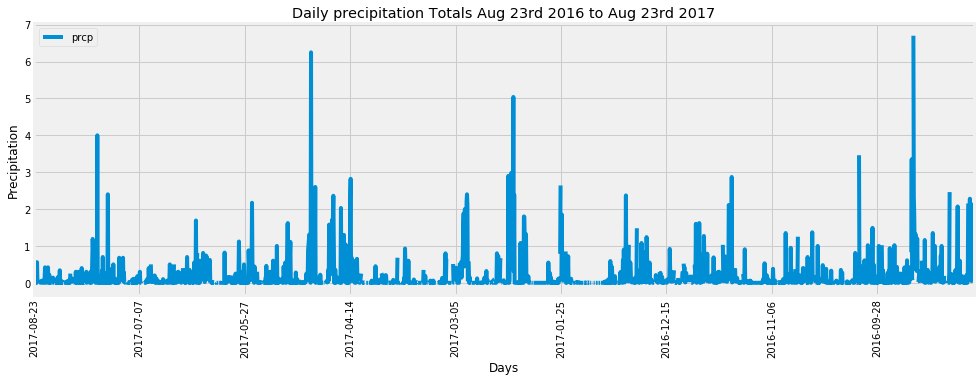

In [42]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
connection = engine.connect()
climateAnalysis = pd.read_sql('Select * from Measurement', connection, parse_dates=['date'])
finalDate = climateAnalysis.date.max()
initialDate = finalDate - timedelta(days = 365)
initialDate
finalDate

# # Perform a query to retrieve the data and precipitation scores
Rain_12months = pd.read_sql("SELECT date, prcp FROM Measurement WHERE date>= '2016-08-23' AND date<= '2017-08-23'", connection, parse_dates=['date'])


# Perform a query to retrieve the data and precipitation scores
# Rain_12months = session.query(Measurements.date, Measurements.prcp).filter(and_(Measurements.date>='2016-08-23', Measurements.date <= '2017-08-23'))
# Rain_12months
# # Save the query results as a Pandas DataFrame and set the index to the date column
# Rain_12months_df = pd.DataFrame(Rain_12months)
# Rain_12months_df.head()

# Sort the dataframe by date
Rain_12months = Rain_12months.sort_values(by='date', ascending=False)
# Rain_12months.groupby('date').sum()
# # Save the query results as a Pandas DataFrame and set the index to the date column
Rain_12months.set_index('date', inplace=True)
Rain_12months.head()

# Create Plot (pandasplot)
Rain_12months_df.plot(x='date', y='prcp', figsize=(15,5))
plt.title("Daily precipitation Totals Aug 23rd 2016 to Aug 23rd 2017")
plt.xticks(rotation = 90)
plt.ylabel('Precipitation')
plt.xlabel('Days')
plt.show()

# # Use Pandas Plotting with Matplotlib to plot the data
# # Generate monthly precipitation totals
# PrcpTotal = []
# Monthly_df = Rain_12months_df[(Rain_12months_df.date>='2016-08-23') & (Rain_12months_df.date<='2016-09-23')]
# PrcpTotal.append(Monthly_df['prcp'].sum())
# Monthly_df = Rain_12months_df[(Rain_12months_df.date>='2016-09-24') & (Rain_12months_df.date<='2016-10-23')]
# PrcpTotal.append(Monthly_df['prcp'].sum())
# Monthly_df = Rain_12months_df[(Rain_12months_df.date>='2016-10-24') & (Rain_12months_df.date<='2016-11-23')]
# PrcpTotal.append(Monthly_df['prcp'].sum())
# Monthly_df = Rain_12months_df[(Rain_12months_df.date>='2016-11-24') & (Rain_12months_df.date<='2016-12-23')]
# PrcpTotal.append(Monthly_df['prcp'].sum())
# Monthly_df = Rain_12months_df[(Rain_12months_df.date>='2016-12-24') & (Rain_12months_df.date<='2017-01-23')]
# PrcpTotal.append(Monthly_df['prcp'].sum())
# Monthly_df = Rain_12months_df[(Rain_12months_df.date>='2017-01-24') & (Rain_12months_df.date<='2017-02-23')]
# PrcpTotal.append(Monthly_df['prcp'].sum())
# Monthly_df = Rain_12months_df[(Rain_12months_df.date>='2017-02-24') & (Rain_12months_df.date<='2017-03-23')]
# PrcpTotal.append(Monthly_df['prcp'].sum())
# Monthly_df = Rain_12months_df[(Rain_12months_df.date>='2017-03-24') & (Rain_12months_df.date<='2017-04-23')]
# PrcpTotal.append(Monthly_df['prcp'].sum())
# Monthly_df = Rain_12months_df[(Rain_12months_df.date>='2017-04-24') & (Rain_12months_df.date<='2017-05-23')]
# PrcpTotal.append(Monthly_df['prcp'].sum())
# Monthly_df = Rain_12months_df[(Rain_12months_df.date>='2017-05-24') & (Rain_12months_df.date<='2017-06-23')]
# PrcpTotal.append(Monthly_df['prcp'].sum())
# Monthly_df = Rain_12months_df[(Rain_12months_df.date>='2017-06-24') & (Rain_12months_df.date<='2017-07-23')]
# PrcpTotal.append(Monthly_df['prcp'].sum())
# Monthly_df = Rain_12months_df[(Rain_12months_df.date>='2017-07-24') & (Rain_12months_df.date<='2017-08-23')]
# PrcpTotal.append(Monthly_df['prcp'].sum())
# PrcpTotal
# # Monthly_df.head()

# # Make the tile list
# Title_List = ('Sep_2016', 'Oct_2016', 'Nov_2016', 'Dec_2016', 'Jan_2017', 'Feb_2017', 'Mar_2017', 'Apr_2017', 'May_2017', 'Jun_2017', 'Jul_2017', 'Aug_2017')
# TitleNo = np.array(range(len(Title_List)))

# # Create a dataframe from calculate values
# Precipitation_dict = {"Months": Title_List, "Precipitation": PrcpTotal}
# Precipitation_df = pd.DataFrame(Precipitation_dict)
# Precipitation_df

# # Create Plot (pandasplot)
# Precipitation_df.plot(kind="bar", figsize=(15,5))
# plt.title("Monthly precipitation Totals Aug 23rd 2016 to Aug 23rd 2017")
# plt.xticks(TitleNo, Title_List, rotation = 60)
# plt.ylabel('Precipitation')
# plt.xlabel('Months')
# plt.grid(axis="x")
# plt.tight_layout()
# plt.show()

# ---------------------------------------------------------------------------------------------------------------------------------------------------------------------

# # Make the tile list
# Rain_List = Rain_12months_df.prcp.tolist()
# len(Rain_List)
# Date_List = Rain_12months_df.date.tolist()
# len(Date_List)
# TitleNo = np.array(range(len(Date_List)))

# # Create a dataframe from calculate values
# Precipitation_dict = {"Months": Date_List, "Precipitation": Rain_List}
# Precipitation_df = pd.DataFrame(Precipitation_dict)
# Precipitation_df



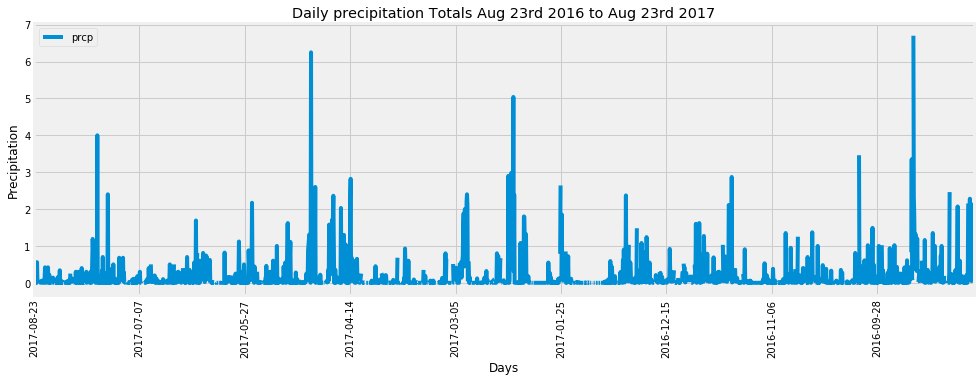

In [41]:
# Create Plot (pandasplot)
Rain_12months_df.plot(x='date', y='prcp', figsize=(15,5))
plt.title("Daily precipitation Totals Aug 23rd 2016 to Aug 23rd 2017")
plt.xticks(rotation = 90)
plt.ylabel('Precipitation')
plt.xlabel('Days')
plt.show()

In [ ]:
# # Use Pandas to calcualte the summary statistics for the precipitation data
# # Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


Precip_data = session.query(Measurements.date, Measurements.prcp)
Precip_data_df = pd.DataFrame(Precip_data)
Precip_data_df.head()

# Create lists and dicts needed
Precip_Dict = {}
Precip_Mean_Dict = {}
Precip_Median_Dict = {}
Precip_Mode_Dict = {}
Precip_Var_Dict = {}
Precip_Std_Dict = {}
Precip_SEM_Dict = {}

Precip_Mean_Dict = Precip_data_df['prcp'].mean()
Precip_Median_Dict = Precip_data_df['prcp'].median()
Precip_Mode_Dict = Precip_data_df['prcp'].mode()
Precip_Var_Dict = Precip_data_df['prcp'].var()
Precip_Std_Dict = Precip_data_df['prcp'].std()
Precip_SEM_Dict = Precip_data_df['prcp'].sem()
    
# # Create and display a summary stats dataframe from calculate values
summary_stats_dict= {"MEAN": Precip_Mean_Dict, "MEDIAN": Precip_Median_Dict, "VARIANCE": Precip_Var_Dict, 
                     "STANDARD DEVIATION": Precip_Std_Dict, "SEM": Precip_SEM_Dict}

summary_stats_dict
# summary_stats_df = pd.DataFrame(summary_stats_dict)
# summary_stats_df


In [ ]:
# Design a query to show how many stations are available in this dataset?
StationNos = pd.read_sql('SELECT station FROM Station', connection)
StationNos.count()


# Design a query to show how many stations are available in this dataset?
# StationNos = session.query(Station.station)
# StationNos_df = pd.DataFrame(StationNos)
# StationNos_df.count()

In [ ]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
connection = engine.connect()
Active_Stations = pd.read_sql('SELECT station, COUNT(station) AS station_count FROM Measurement GROUP BY station ORDER BY station_count DESC', connection)
# Active_Stations_df = pd.DataFrame(Active_Stations)
# Active_Stations_df.head(20)
Active_Stations


In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded
# highest temperature recorded, and average temperature of the most active station?
MinTemp = pd.read_sql('SELECT MIN(tobs) AS Min_Temperature FROM Measurement WHERE station = "USC00519281"', connection)
MaxTemp = pd.read_sql('SELECT MAX(tobs) AS Max_Temperature FROM Measurement WHERE station = "USC00519281"', connection)
AvgTemp = pd.read_sql('SELECT AVG(tobs) AS Avg_Temperature FROM Measurement WHERE station = "USC00519281"', connection)
# TempList = [MinTemp, MaxTemp, AvgTemp]
TempList = pd.read_sql('SELECT MIN(tobs) AS Min_Temperature FROM Measurement WHERE station = "USC00519281"', connection)
TempList['MaxTemp'] = pd.read_sql('SELECT MAX(tobs) AS Max_Temperature FROM Measurement WHERE station = "USC00519281"', connection)
TempList['AvgTemp'] = pd.read_sql('SELECT AVG(tobs) AS Avg_Temperature FROM Measurement WHERE station = "USC00519281"', connection)
TempList


# # # Create a summary data frame opt1
# # Temps_df = pd.DataFrame(TempList, columns=["Min Temp", "Max Temp", "Avg Temp"])
# # Temps_df

# # Create a summary data frame opt2
# Temp_stats_dict= {"Min Temp": MinTemp, "Max Temp": MaxTemp, "Avg Temp": AvgTemp}
# Temp_stats_df = pd.DataFrame(Temp_stats_dict, index=pd.Index(MaxTemp))
# Temp_stats_df



In [ ]:
# Choose the station with the highest number of temperature observations.
TempRange=[]
TempRange.append(pd.read_sql('SELECT Min(tobs), Max(tobs) FROM Measurement', connection))
TempRange
mostTemps_station = pd.read_sql('SELECT station, COUNT(tobs) AS Temp_Obs_count FROM Measurement WHERE tobs>= 50 AND tobs<= 90 GROUP BY station ORDER BY Temp_Obs_count DESC', connection)
mostTemps_station

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# Calculate the date 1 year ago from the last data point in the database
TempRange=[]
TempRange.append(pd.read_sql('SELECT Min(date), Max(date) FROM Measurement', connection))
TempRange

# # Perform a query to retrieve the temperature data from specific station
Temp_12months = pd.read_sql("SELECT date, tobs FROM Measurement WHERE station='USC00519281' AND date>= '2016-08-23' AND date<= '2017-08-23'", connection, parse_dates=['date'])
Temp_12months.head()
Temp_12months.count()

# # Perform a query to retrieve the temperature data from specific station
# Temp_12months = session.query(Measurements.date, Measurements.tobs).filter(and_(Measurements.station='USC00519281', Measurements.date>='2016-08-23', Measurements.date <= '2017-08-23'))
# # Save the query results as a Pandas DataFrame and set the index to the date column
# Temp_12months_df = pd.DataFrame(Temp_12months)
# Temp_12months_df.tail(50)
# Temp_12months_df.count()

# # Make the tile list
Temps_List = Temp_12months.tobs.tolist()
len(Temps_List)
Date_List = Temp_12months.date.tolist()
len(Date_List)
# # TitleNo = np.array(range(len(Date_List)))
# Title_List = np.arange(1, 366, 1)
# len(Title_List)
# # TitleNo = np.array(range(len(Title_List)))

# Create a dataframe from calculate values
Temperature_dict = {"Days": Date_List, "Temperature": Temps_List}
Temperature_df = pd.DataFrame(Temperature_dict)
Temperature_df.dtypes

# # Create Plot (pandasplot)
Temperature_df.plot(kind="bar", figsize=(15,5))
plt.title("Daily Temperature Totals Aug 23rd 2016 to Aug 23rd 2017")
plt.xticks(TitleNo, Title_List, rotation = 60)
plt.ylabel('Temperature')
plt.xlabel('Days')
plt.grid(axis="x")
plt.tight_layout()
plt.show()


## Bonus Challenge Assignment

In [17]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurements.tobs), func.avg(Measurements.tobs), func.max(Measurements.tobs)).\
        filter(Measurements.date >= start_date).filter(Measurements.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [18]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax
# for your trip using the previous year's data for those same dates.
print(calc_temps('2016-08-23', '2017-08-23'))

[(58.0, 74.59058295964125, 87.0)]


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
